In [1]:
import pandas as pd
import re
import textwrap
from common.evaluate_helpers import preprocess_text as preprocess_text_bm25
from nltk.tokenize import word_tokenize
from tabulate import tabulate

# Set display options to show full content of each column
pd.set_option("display.max_colwidth", None)


def preprocess_text(text: str) -> str:
    if type(text) != str:
        return ""

    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove unnecessary whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words and stem
    return " ".join([word for word in tokens])

In [2]:
MINISTRY = "minfin"

woo_data = pd.read_csv(f"./docs_ministries_full/{MINISTRY}/woo_merged.csv.gz")

### Display all corresponding documents

In [1]:
# TYPES = ["all"]
TYPES = ["verzoek", "besluit"]
# TYPES = ["bijlage", "inventaris"]
RELEVANT_COLUMNS = ["dossier_id", "type", "source", "bodyText"]
RELEVANT_DISPLAY_COLUMNS = ["dossier_id", "document_id", "type", "source", "bodyText"]
RELEVANT_DISPLAY_COLUMNS_2 = ["dossier_id", "document_id", "type", "source"]

filtered_data = woo_data[(woo_data["type"].isin(TYPES))]

# Explicitly copy the filtered DataFrame to avoid SettingWithCopyWarning when modifying it.
filtered_data = filtered_data[RELEVANT_DISPLAY_COLUMNS].copy()
filtered_data.drop_duplicates(inplace=True, subset=RELEVANT_COLUMNS)
filtered_data.reset_index(inplace=True, drop=True)

print(tabulate(filtered_data, headers=RELEVANT_DISPLAY_COLUMNS_2, tablefmt="psql"))

NameError: name 'woo_data' is not defined

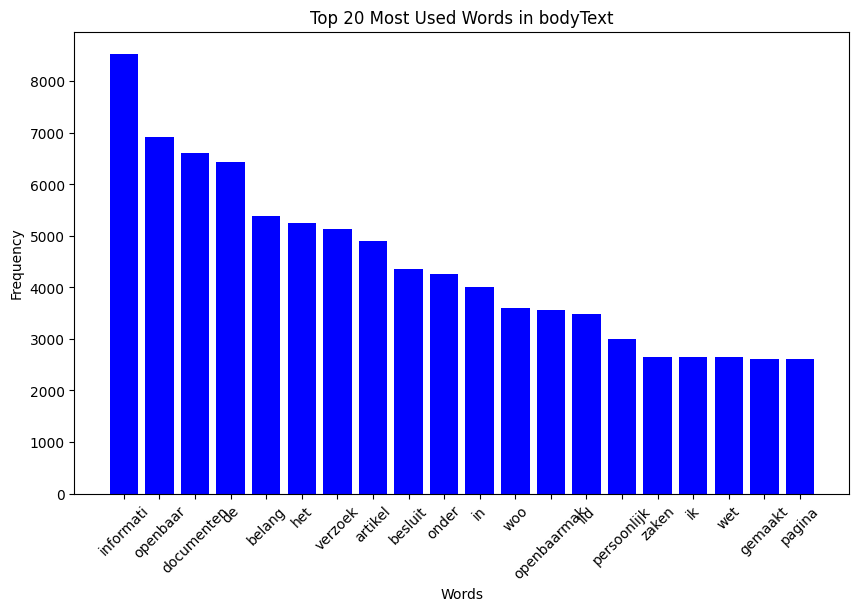

In [8]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re

# Sample data for demonstration
# filtered_data = pd.DataFrame({'bodyText': [...]})  # Your actual DataFrame

# Function to clean and tokenize the text
def tokenize(text):
    text = text.lower()  # Convert to lowercase
    words = re.findall(r'\b\w+\b', text)  # Find all words
    return words

# Concatenate all the bodyText into a single string
all_text = ' '.join(filtered_data['bodyText'].dropna().astype(str))

# Tokenize the text
words = preprocess_text_bm25(all_text)

# Count the frequency of each word
word_counts = Counter(words)

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Create a DataFrame for the 20 most common words
common_words_df = pd.DataFrame(common_words, columns=['word', 'frequency'])

# Plot the frequencies
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['word'], common_words_df['frequency'], color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Used Words in bodyText')
plt.xticks(rotation=45)
plt.show()
